# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

***Цель исследования*** - установить параметры, влияющие на рыночную стоимость объектов недвижимости.  

***Исходные данные*** - данные сервиса «Яндекс.Недвижимость» (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).  

***Ход исследования:***

Сколько времени занимает продажа квартиры? Когда продажу можно назвать быстрой / долгой?
Какие факторы больше всего влияют на стоимость квартиры и от чего они зависят?
Какая средняя стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений?
Какие факторы влияют на стоимость квартиры в центре Санкт-Петербурга? 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортировали библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#считываем датасет
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
#изучим полученные данные 
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


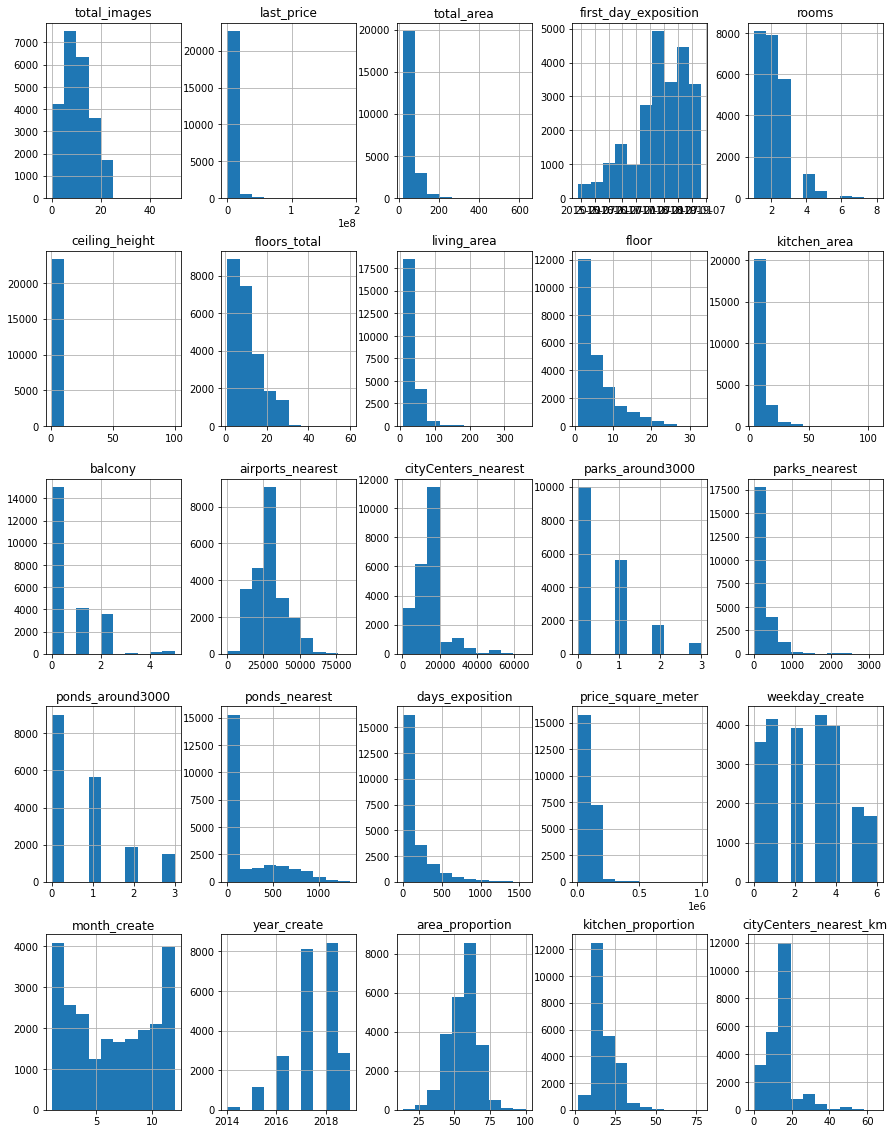

In [102]:
# создадим гистограмму по всем столбцам датафрейма
data.hist(figsize=(15, 20))
plt.show()

***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
Для корректного отображения датасета указали разделитель и проверили результат.  
В данной таблице 23699 строк и 22 столбца.     
В данных есть пропущенные значения.   
    
***Наименование столбцов:***  
    
**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)  
**balcony** — число балконов  
**ceiling_height** — высота потолков (м)  
**cityCenters_nearest** — расстояние до центра города (м)   
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)  
**first_day_exposition** — дата публикации  
**floor** — этаж  
**floors_total** — всего этажей в доме  
**is_apartment** — апартаменты (булев тип)  
**kitchen_area** — площадь кухни в квадратных метрах (м²)  
**last_price** — цена на момент снятия с публикации  
**living_area** — жилая площадь в квадратных метрах (м²)  
**locality_name** — название населённого пункта  
**open_plan** — свободная планировка (булев тип)  
**parks_around3000** — число парков в радиусе 3 км  
**parks_nearest** — расстояние до ближайшего парка (м)  
**ponds_around3000** — число водоёмов в радиусе 3 км  
**ponds_nearest** — расстояние до ближайшего водоёма (м)  
**rooms** — число комнат  
**studio**— квартира-студия (булев тип)  
**total_area** — общая площадь квартиры в квадратных метрах (м²)  
**total_images** — число фотографий квартиры в объявлении  
    
Пропуски в высоте потолков, размерах жилой площади и кухни скорее всего, говорят о том, что они стандартных размеров.
Пропуски в столбце "Число балконов"(balcony) вполне указывают на то, что в некоторых квартирах их просто нет.
Информацию о наличие водоемов, парка, возможно, сочли не нужной и она не была обязательна для заполнения (заполнялась пользователями). Пропуски в количестве дней, в течение которых было опубликовано объявление до продажи квартир. 
Пропуски будут заполнены по среднему значению или медиане.
</div>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# проверим наличие явных дубликатов
data.duplicated().sum()

0

In [7]:
# проверим наличие неявных дубликатов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [8]:
# проверим количество неявных дубликатов
data['locality_name'].nunique()

364

In [9]:
# изменили в дубликате посёлок ё на е
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [10]:
# проверили изменения
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

***Вывод:***
<div style="border:solid green 1px; padding: 20px">  
    
Посмотрев информацию о данных, сделали вывод: 
    
В столбцах:    
**first_day_exposition** (дата публикации) - тип object - так как это дата, то должен быть тип datetime        
**ceiling_height** (высота потолков) - нулевые значения тип NaN   
**floors_total** (всего этажей в доме) - должен быть тип int (целое число), т.к. количество этажей должно быть целым значением и есть пропущенные значения тип NaN    
**is_apartment** (апартаменты) - должен быть булев тип   
**living_area** (жилая площадь в квадратных метрах) - есть пропущенные значения тип NaN  
**kitchen_area** (площадь кухни в квадратных метрах) - есть пропущенные значения тип NaN      
**balcony** (число балконов) - есть пропущенные значения тип NaN       
**locality_name** (название населённого пункта) - есть пропущенные значения   
**airports_nearest** (расстояние до ближайшего аэропорта в метрах) - есть пропущенные значения тип NaN    
**cityCenters_nearest** (расстояние до центра город) - есть пропущенные значения тип NaN     
**parks_around3000** (число парков в радиусе 3 км) - должен быть тип int (целое число) и есть пропущенные значения тип NaN   
**parks_nearest** (расстояние до ближайшего парка) - есть пропущенные значения тип NaN    
**ponds_around3000** (число водоёмов в радиусе 3 км) - должен быть тип int (целое число) и есть пропущенные значения тип NaN   
**ponds_nearest** (расстояние до ближайшего водоёма) - есть пропущенные значения тип NaN    
**days_exposition**  (сколько дней было размещено объявление (от публикации до снятия) - должен быть тип int (целое число) и есть пропущенные значения тип NaN

Явные дубликаты отсутствуют.
Проработали неявные дубликаты и привели данные к одинаковому значению.

По ряду признаков присутствуют аномальные значения.    
</div>

### Предобработка данных

<div style="border:solid blue 1px; padding: 20px"> 
    
# Цели:

1. Найти и изучить пропущенные значения в столбцах.
2. Заполнить пропущенные значения там, где это возможно.
3. Рассмотреть типы данных в каждом столбце. 
4. Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты.   
5. Найти и устранить редкие и выбивающиеся значения.   
    
</div>

In [11]:
# рассмотрим значения в столбцах для выявления нестандартных значений
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


***Вывод:***
<div style="border:solid green 1px; padding: 20px">
Столбцы проименованы верно (применен змеиный регистр) и не нуждаются в переименовании.
</div>

In [12]:
# выводим количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
# приводим в целочисленный тип стоимость квартиры
data['last_price'] = data['last_price'].astype(int)

In [14]:
# проверим результат
data['last_price'].head()

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: int64

In [15]:
# переведем столбец с датой в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
# проверим как изменился формат даты и тип
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [17]:
# в столбце is_apartment (апартаменты) все пропущенные значения заменим на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [18]:
data['is_apartment'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: bool

In [19]:
# заменим пропуски в числе балконов на 0 и изменим тип данных на int (целое число)
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [20]:
# проверим изменения
data['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int64

In [21]:
# заменим пропуски в days_exposition (сколько дней было размещено объявление (от публикации до снятия) 
# и заменим тип данных на  int (целое число)
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [22]:
# проверим изменения
data['days_exposition'].head()

0      0
1     81
2    558
3    424
4    121
Name: days_exposition, dtype: int64

In [23]:
# выводим количество оставшихся после обработки пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

In [24]:
# удаляем записи, где отсутствует локация и этажность
data.dropna(subset=['floors_total'], inplace=True)
data.dropna(subset=['locality_name'], inplace=True)

In [25]:
# проверили результат
data['floors_total'].isna().sum()

0

In [26]:
# проверили результат
data['locality_name'].isna().sum()

0

In [27]:
# приводим этажность к целочисленному типу
data['floors_total'] = data['floors_total'].astype(int)

In [28]:
# проверили результат
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int64

In [29]:
# заменяем пустые значения высоты потолков на медианное значение
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [30]:
# заменяем пустые значения жилой площади и площади кухни на среднее
living_ar = data['living_area'].mean() / data['total_area'].mean()
kitchen_ar = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ar * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ar * data['total_area'], inplace=True)

In [31]:
# заменяем пустые значения расстояния до ближайшего аэропорта на среднее
data['airports_nearest'] = data['airports_nearest'].astype('float64')
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].mean())

In [32]:
# заменяем пустые значения расстояния до центра города на среднее
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float64')
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].mean())

In [33]:
# заменяем пустые значения расстояния до ближайшего парка на среднее
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].astype('int')

In [34]:
# заменяем пустые значения расстояния до ближайшего водоема на среднее
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].astype('int')

In [35]:
# проверяем количество пропущенных значений для каждого столбца 
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000        5500
parks_nearest              0
ponds_around3000        5500
ponds_nearest              0
days_exposition            0
dtype: int64

In [36]:
# проверим сколько строк осталось и как поменялся тип значений после обработки
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Проверим аномальные значения** в столбцах last_price, rooms, total_area, living_area, floor, kitchen_area.

In [37]:
# проверим аномальные значения по количеству комнат
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

(0.0, 15000000.0)

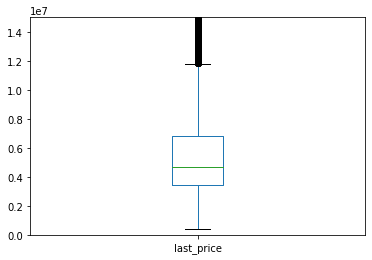

In [106]:
data['last_price'].plot(kind='box')
plt.ylim(0, 15000000)

Разберемся с аномально маленькими значениями. Удалим строку с минимальным значением в 12 тысяч рублей, так как квартира не может столько  стоить.


In [39]:
data = data.drop(data['last_price'].idxmin()).reset_index(drop=True)

Квартира стоимостью 763 млн. руб сильно выбивается среди остальных значений. Построим гистограмму для квартир стоимостью больше 100 млн. руб.

<AxesSubplot:>

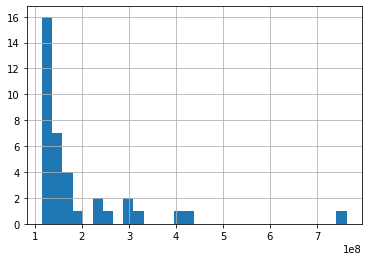

In [40]:
data.query('last_price > 100000000')['last_price'].hist(bins=30)

Выше 200 млн. руб стоят очень мало квартир, их можно удалить как выбивающиеся значения.

In [41]:
data = data.drop(data.query('last_price > 200000000').index).reset_index(drop=True)

In [42]:
# проверим результат обработки
data['last_price'].describe()

count    2.355500e+04
mean     6.406195e+06
std      7.910227e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.640000e+06
75%      6.777500e+06
max      1.908700e+08
Name: last_price, dtype: float64

Минимальная стоимость в 430 тыс. руб. является адекватной. Возможно, это квартира с мальенькой площадью и в области.

In [43]:
# проверим 0  и аномальные значения по количеству комнат
data['rooms'].describe()

count    23555.000000
mean         2.069157
std          1.074817
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

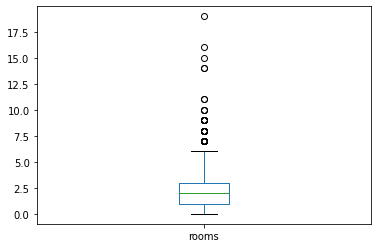

In [44]:
data['rooms'].plot(kind='box')

Комнат не может быть 0 и скорее не может быть 19. 
0 заменим на один, а где комнат больше 8 отбросим.

In [45]:
# Комнат не может быть 0. Возможно, это квартира-студия и значение заменим на 1
data['rooms'] = data['rooms'].replace(0, 1)

In [46]:
# отбросим квартиры, где комнат больше 8
data = data.query('rooms <= 8')
data['rooms'].value_counts()

1    8198
2    7895
3    5778
4    1172
5     324
6     101
7      57
8      12
Name: rooms, dtype: int64

In [47]:
# проверим количество нулевых значений
data['rooms'].isna().sum()

0

In [48]:
# проверим аномальные значения в общей площади
data['total_area'].describe()

count    23537.000000
mean        59.993153
std         33.927733
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        631.200000
Name: total_area, dtype: float64

<AxesSubplot:>

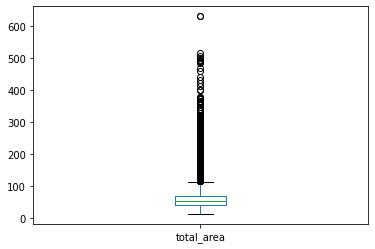

In [49]:
data['total_area'].plot(kind='box')

Отбросим квартиры с общей площадью меньше 20 квадратных метров. Квартиры с аномально большой площадью пока не будем считать выбросами, так как они могут быть элитными домами.

In [50]:
# Отбросим квартиры с площадью меньше 20 квадратных метров
data = data.query('total_area >= 20')
data['total_area'].value_counts()

45.00     419
42.00     383
60.00     346
31.00     346
44.00     343
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2123, dtype: int64

In [51]:
# проверим аномальные значения в жилой площади
data['living_area'].describe()

count    23510.000000
mean        34.427114
std         21.497845
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        360.410721
Name: living_area, dtype: float64

<AxesSubplot:>

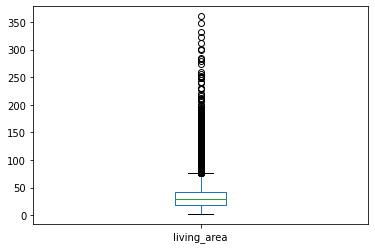

In [52]:
data['living_area'].plot(kind='box')

Отбросим значения жилой площади, которые меньше 10 кв. м. Ситуация с большой площадью аналогична ситуации с total_area.

In [53]:
# отбросили значения меньше 10 кв. м
data = data.query('living_area > 9')
data['living_area'].value_counts()

18.00    882
17.00    673
30.00    598
16.00    481
20.00    479
        ... 
35.77      1
96.40      1
50.26      1
43.81      1
16.74      1
Name: living_area, Length: 2368, dtype: int64

In [54]:
# проверим аномальные значения в площади кухни
data['kitchen_area'].describe()

count    23488.000000
mean        10.473320
std          5.908225
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

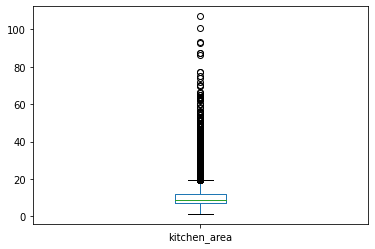

In [55]:
data['kitchen_area'].plot(kind='box')

Отбросим значения, в которых кухня может быть меньше 4 кв. м. Квартиры, где кухня имеет большую площадь, значит и общая площадь квартиры будет большая, поэтому считать их выбросами нельзя.

In [56]:
# отбросили значения, где кухня меньше 4 кв. м.
data =data.query('kitchen_area >= 4')
data['kitchen_area'].value_counts()

6.000000     1297
10.000000    1259
8.000000     1108
9.000000     1098
7.000000     1062
             ... 
53.100000       1
14.986386       1
13.410000       1
34.510000       1
16.740000       1
Name: kitchen_area, Length: 1604, dtype: int64

***Вывод:***
<div style="border:solid green 1px; padding: 20px">  
   
В ходе предобработки данных были заполнены пропуски в столбцах с которыми предстоит работать дальше. 
В столбце число балконов были пропущены значения, скорее всего, это связано с отсутствием балконов.
В других столбцах отсутствие данных связано с тем, что данные заполнялись пользователями и не были обязательными к заполнению. 
В столбцах parks_around3000, ponds_around3000 оставили незаполненные значения, так как мы их не будем использовать в анализе.      
Удалили записи, где отсутствовала локация и этажность. 
Всего были удалены 134 строки.   
Изменили аномальные значения высоты потолков на медианное значение.  
Выявили аномальные значения в столбце количество комнат и изменили нулевое значение на 1, так как 0 комнат быть не может и отбросили количество комнат больше восьми. Отбросим квартиры с общей площадью меньше 20 квадратных метров. Квартиры с аномально большой площадью оставили, так как они могут быть элитными домами. Отбросим значения жилой площади, которые меньше 10 кв. м.
Отбросим значения, в которых кухня может быть меньше 4 кв. м. Квартиры, где кухня имеет большую площадь, значит и общая площадь квартиры будет большая, поэтому оставили их.  
Данные готовы для дальнейшего анализа.      
</div>

### Посчитайте и добавьте в таблицу новые столбцы

<div style="border:solid blue 1px; padding: 20px"> 
    
# Цели:


1. Цена одного квадратного метра.  
2. День недели публикации объявления (0 — понедельник, 1 — вторник и так далее).  
3. Месяц публикации объявления.  
4. Год публикации объявления.  
5. Тип этажа квартиры (значения — «‎первый», «последний», «другой»).  
6. Расстояние до центра города в километрах.   
    
</div>

In [57]:
#рассчитаем стоимость квадратного метра
data['price_square_meter'] = data['last_price'] / data['total_area']

In [58]:
# и преведем ее к целому числу int для удобства
data['price_square_meter'] = data['price_square_meter'].astype('int')

In [59]:
# проверим результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2.0,755,0,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,0,0.0,0,81,82920
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2.0,574,558,92785
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3.0,234,424,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1.0,48,121,100000


In [60]:
# создаем столбец дня недели
data['weekday_create'] = data['first_day_exposition'].dt.weekday

In [61]:
# создаем столбец месяца публикации
data['month_create'] = data['first_day_exposition'].dt.month

In [62]:
# создаем столбец года
data['year_create'] = data['first_day_exposition'].dt.year

In [63]:
# проверяем результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_create,month_create,year_create
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028.0,1.0,482,2.0,755,0,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,18603.0,0.0,0,0.0,0,81,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,13933.0,1.0,90,2.0,574,558,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,...,6800.0,2.0,84,3.0,234,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8098.0,2.0,112,1.0,48,121,100000,1,6,2018


In [64]:
#напишем функцию для типа этажей.
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [65]:
# применим с помощью функции  
data['floor_category'] = data.apply(floor_category, axis = 1)

In [66]:
# проверим результат работы функции
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_create,month_create,year_create,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1.0,482,2.0,755,0,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0.0,0,0.0,0,81,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,1.0,90,2.0,574,558,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,...,2.0,84,3.0,234,424,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2.0,112,1.0,48,121,100000,1,6,2018,другой


In [67]:
# сделали выборку и проверили результат
stat = data[['locality_name', 'floor', 'floor_category']]
print(stat.head(10))

               locality_name  floor floor_category
0            Санкт-Петербург      8         другой
1             поселок Шушары      1         первый
2            Санкт-Петербург      4         другой
3            Санкт-Петербург      9         другой
4            Санкт-Петербург     13         другой
5  городской поселок Янино-1      5         другой
6          поселок Парголово      6         другой
7            Санкт-Петербург     22         другой
8             поселок Мурино     26         другой
9            Санкт-Петербург      7         другой


In [68]:
# добавляем столбец с отношением жилой площади к общей (area_proportion), переведем в % и приведем его в целочисленный тип int
data['area_proportion'] = data['living_area'] / data['total_area'] * 100
data['area_proportion'] = data['area_proportion'].fillna(value=0).astype(int)

In [69]:
# проверяем результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_create,month_create,year_create,floor_category,area_proportion
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482,2.0,755,0,120370,3,3,2019,другой,47
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,0.0,0,81,82920,1,12,2018,первый,46
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90,2.0,574,558,92785,3,8,2015,другой,61
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,...,84,3.0,234,424,408176,4,7,2015,другой,57
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112,1.0,48,121,100000,1,6,2018,другой,32


In [70]:
# добавляем столбец с отношением площади кухни к общей (kitchen_proportion), переводим в % и приводим его в целочисленный тип int
data['kitchen_proportion'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_proportion'] = data['kitchen_proportion'].fillna(value=0).astype(int)

In [71]:
# проверяем результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_create,month_create,year_create,floor_category,area_proportion,kitchen_proportion
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2.0,755,0,120370,3,3,2019,другой,47,23
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0.0,0,81,82920,1,12,2018,первый,46,27
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,2.0,574,558,92785,3,8,2015,другой,61,14
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,...,3.0,234,424,408176,4,7,2015,другой,57,17
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48,121,100000,1,6,2018,другой,32,41


In [72]:
# создадим столбец и переведем расстояние до центра города из метров в километры
# и переведем данные в целочисленный тип int
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

In [73]:
# проверяем результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_square_meter,weekday_create,month_create,year_create,floor_category,area_proportion,kitchen_proportion,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,755,0,120370,3,3,2019,другой,47,23,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,81,82920,1,12,2018,первый,46,27,18
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,574,558,92785,3,8,2015,другой,61,14,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,...,234,424,408176,4,7,2015,другой,57,17,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,48,121,100000,1,6,2018,другой,32,41,8


***Вывод:***
<div style="border:solid green 1px; padding: 20px">  
    
Добавили новые столбцы и рассчитали значения в них по поставленным целям:   
1. Цена одного квадратного метра.      
2. День недели публикации объявления (0 — понедельник, 1 — вторник и так далее).      
3. Месяц публикации объявления.      
4. Год публикации объявления.      
5. Тип этажа квартиры (значения — «‎первый», «последний», «другой»).      
6. Расстояние до центра города в километрах.  
    
Также добавили столбцы с отношением жилой площади и площади кухни к общей площади жилья в процентах
      
</div>

### Проведите исследовательский анализ данных

<div style="border:solid blue 1px; padding: 20px"> 
    
# Цели:

Изучить следующие параметры объектов:  
 - общая площадь;  
 - жилая площадь;  
 - площадь кухни;  
 - цена объекта;  
 - количество комнат;  
 - высота потолков;  
 - этаж, на котором расположена квартира; 
 - тип этажа; 
 - общее количество этажей в доме;  
 - расстояние до центра города в метрах;  
 - расстояние до ближайшего аэропорта;  
 - расстояние до ближайшего парка;  
 - день и месяц публикации объявления.  
    
Построить отдельные гистограммы для каждого из этих параметров.              
      
</div>

count    23420.000000
mean        60.156164
std         33.915163
min         20.000000
25%         40.000000
50%         52.000000
75%         69.742500
max        631.200000
Name: total_area, dtype: float64

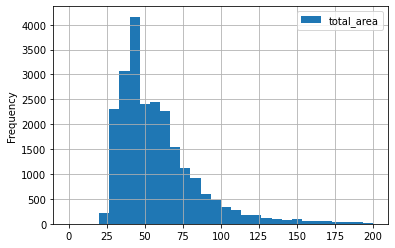

In [74]:
# рассмотрим общую площадь и создадим гистограмму
data
data.plot(y='total_area', kind='hist', bins=30, grid=True, figsize=(6,4), range=(0,200))
data['total_area'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
**Площадь**  
Большинство квартир - меньше 100 м2, чаще всего это квартиры от 50 до 70 м2. В данных есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров. Возможно, это ошибки при выгрузке данных.

</div>

count    23420.000000
mean        34.502349
std         21.500072
min          9.100000
25%         19.000000
50%         30.000000
75%         42.100000
max        360.410721
Name: living_area, dtype: float64

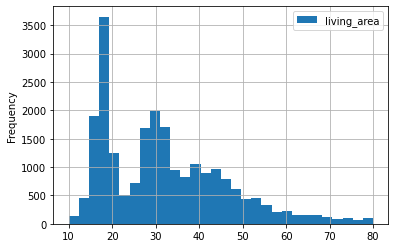

In [75]:
# рассмотрим жилую площадь и создадим гистограмму
data
data.plot(y='living_area', kind='hist', bins=30, grid=True, figsize=(6,4), range=(10,80))
data['living_area'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
**Жилая площадь**  
Самые распространённые варианты с жилой площадью от 10 до 50 кв. метров, в среднем она варьируется от 30 до 40 м2.  
Две вершины графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.     

</div>

count    23420.000000
mean        10.493708
std          5.904558
min          4.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

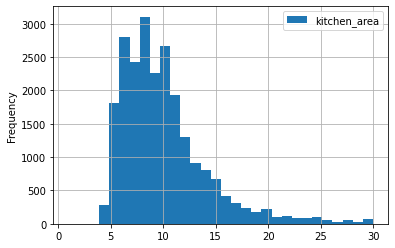

In [76]:
# рассмотрим площадь кухни и создадим гистограмму
data
data.plot(y='kitchen_area', kind='hist', bins=30, grid=True, figsize=(6,4), range=(1,30))
data['kitchen_area'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
**Площадь кухни**  
Самые распространённые кухни - от 5 до 15 кв. метров. Больше 20 кв. метров кухни практически не встречаются. В среднем стандартная кухня 9 м2.      

</div>

count    23420.000000
mean         2.074851
std          1.029431
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

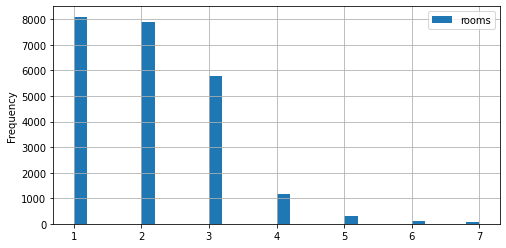

In [77]:
# рассмотрим количество комнат и создадим гистограмму
data
data.plot(y='rooms', kind='hist', bins=30, grid=True, figsize=(8,4), range=(1,7))
data['rooms'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
      
**Комнаты**    
В основном это 1, 2 и 3 комнатные квартиры. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно. Больще всего объявлений с 1 и 2 комнатными квартирами.     

</div>

count    23420.000000
mean         2.724243
std          0.993861
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

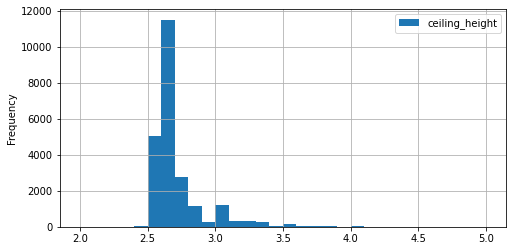

In [78]:
# рассмотрим высоту потолков и создадим гистограмму
data
data.plot(y='ceiling_height', kind='hist', bins=30, grid=True, figsize=(8,4), range=(2,5))
data['ceiling_height'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
      
**Высота потолков**       
Большинство квартир имеют высоту потолков от 2,5 до 2,7 метров. Больше 4 метров высота потолков - это скорее всего ошибка в данных.      

</div>

count    23420.000000
mean         5.873228
std          4.863966
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

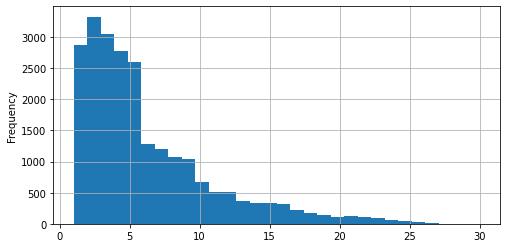

In [79]:
# рассмотрим этаж квартиры и создадим гистограмму
data
data['floor'].plot(y='floor', kind='hist', bins=30, grid=True, figsize=(8,4), range=(1,30))
data['floor'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
    
**Этажи квартир**  
В объявлениях в основном квартиры с 1 по 10 этаж, меньше с этажами выше 10.    

</div>

count    23420.000000
mean        10.670495
std          6.587879
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

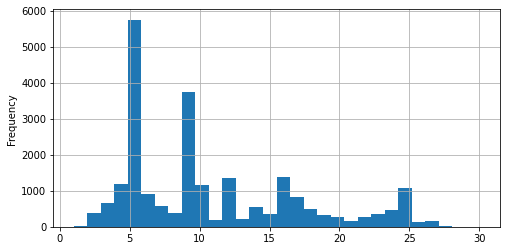

In [80]:
# рассмотрим общее количество этажей в доме и создадим гистограмму
data
data['floors_total'].plot(y='floors_total', kind='hist', bins=30, grid=True, figsize=(8,4), range=(1,30))
data['floors_total'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
**Всего этажей**  
В объявлениях дома от 1 до 25 этажных, в среднем большая часть объявлений с домами, имеющими 5 или 6 этажей, чуть меньше 9 этажных.      

</div>

count    2.342000e+04
mean     6.400795e+06
std      7.870393e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.799000e+06
max      1.908700e+08
Name: last_price, dtype: float64

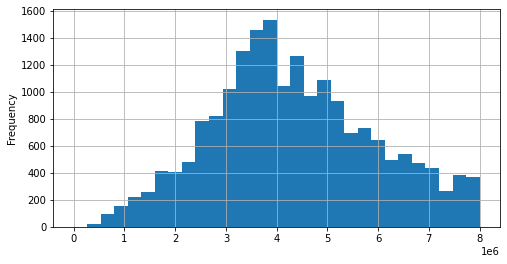

In [81]:
# рассмотрим стоимость и создадим гистограмму
data
data['last_price'].plot(y='last_price', kind='hist', bins=30, grid=True, figsize=(8,4), range = (0,8000000))
data['last_price'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
      
**Стоимость**    
В основном стоимость квартир от 1,2 до 8 миллионов. Максимальное количество объявлениий со стоимостью от 3 до 5 млн.    

</div>

count     23420.000000
mean      98977.093083
std       45910.678531
min        7962.000000
25%       76510.750000
50%       94915.000000
75%      114063.500000
max      995983.000000
Name: price_square_meter, dtype: float64

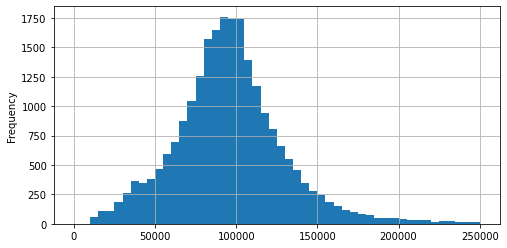

In [82]:
# рассмотрим стоимость квадратного метра и создадим гистограмму
data
data['price_square_meter'].plot(y='price_square_meter', kind='hist', bins=50, grid=True, figsize=(8,4), range = (0,250000))
data['price_square_meter'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
**Стоимость квадратного метра**  
Имеет нормальное распределение с пиком в районе 80 до 100 тыс. Дальше гистограмма идет на спад.    

</div>

count    23420.000000
mean     14211.179964
std       7546.256334
min        181.000000
25%      10952.000000
50%      14192.656056
75%      15254.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

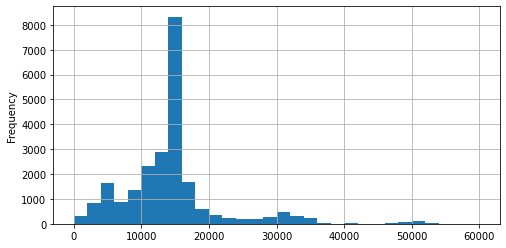

In [83]:
# рассмотрим расстояние до центра в м и создадим гистограмму
data
data['cityCenters_nearest'].plot(y='cityCenters_nearest', kind='hist', bins=30, grid=True, figsize=(8,4), range = (0,60000))
data['cityCenters_nearest'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
    
**Расстояние до центра**  
Расстояние до центра города составляет от 180 метров до 65 км. Так как местоположение многих объектов недвижимости находится за пределами Санкт-Петербурга в области. Больше всего квартир находится от центра в расстоянии 14-15 км.    

</div>

count    23420.000000
mean     28814.029858
std      11069.702318
min          0.000000
25%      21143.750000
50%      28797.082701
75%      34434.250000
max      84869.000000
Name: airports_nearest, dtype: float64

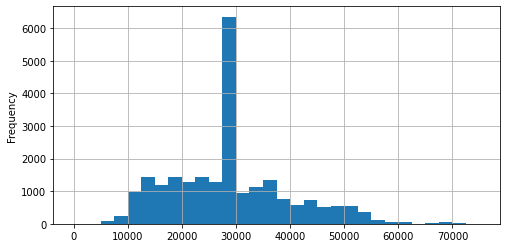

In [84]:
# рассмотрим расстояние до аэропорта и создадим гистограмму
data
data['airports_nearest'].plot(y='airports_nearest', kind='hist', bins=30, grid=True, figsize=(8,4), range = (0,75000))
data['airports_nearest'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
    
**Расстояние до аэропорта**  
Больше всего квартир продается с расстоянием до аэропорта в 28 км. Незначительное количество вблизи аэропорта.   
    

</div>

count    23420.000000
mean       167.083219
std        306.324876
min          0.000000
25%          0.000000
50%          0.000000
75%        300.250000
max       3190.000000
Name: parks_nearest, dtype: float64

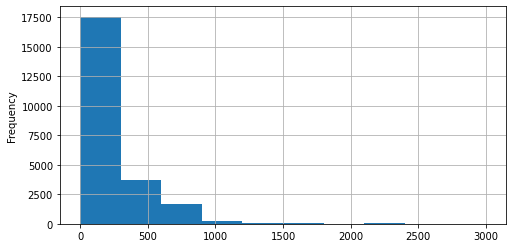

In [85]:
# рассмотрим расстояние до ближайшего парка и создадим гистограмму
data
data['parks_nearest'].plot(y='parks_nearest', kind='hist', bins=10, grid=True, figsize=(8,4), range = (0,3000))
data['parks_nearest'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    

**Расстояние до ближайшего парка**  
Большая часть объектов недвижимости располагается вблизи парков с максимальным расстоянием в 300 метров.    

</div>

count    23420.000000
mean         2.567805
std          1.787762
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_create, dtype: float64

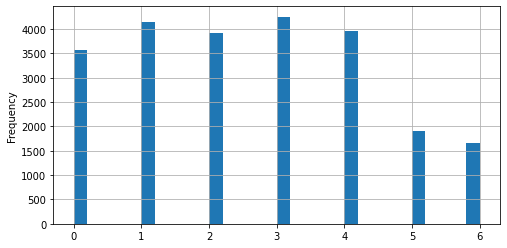

In [86]:
# рассмотрим дни недели, когда размещались объявления и создадим гистограмму
data
data['weekday_create'].plot(y='weekday_create', kind='hist', bins=30, grid=True, figsize=(8,4), range = (0,6))
data['weekday_create'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
**Дни недели, когда размещались объявления**  
Активное размещение объявлений приходится на будние дни с понедельника по пятницу и лишь незначительная часть на выходные - суббота, воскресенье.      

</div>

count    23420.000000
mean         6.403800
std          3.492535
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_create, dtype: float64

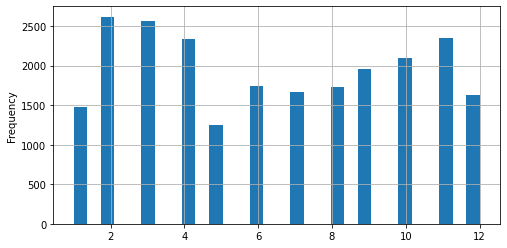

In [87]:
# рассмотрим месяцы, когда размещались объявления и создадим гистограмму
data
data['month_create'].plot(y='month_create', kind='hist', bins=30, grid=True, figsize=(8,4), range = (1,12))
data['month_create'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
**Месяцы, когда размещались объявления**  
Максимальное количество объявлений пришлось на февраль и март, чуть меньше на апрель и ноябрь.     

</div>

count      23420
unique         3
top       другой
freq       17232
Name: floor_category, dtype: object

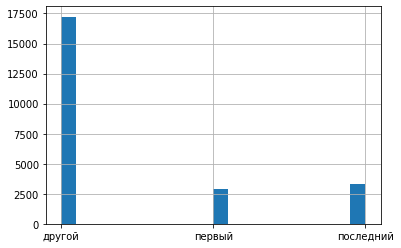

In [88]:
# рассмотрим тип этажа и создадим гистограмму
data['floor_category'].hist(bins=20)
data['floor_category'].describe()

<div style="border:solid green 1px; padding: 20px"> 
    
**Тип этажа**  
Наибольшее количество объявлений с типом этажа "другой", далее "последний", а уж совсем не в приоритете "первый".  
    

</div>

<div style="border:solid blue 1px; padding: 20px"> 
    
# Цели:
Изучить, как быстро продавались квартиры (столбец days_exposition).  
Постройть гистограмму.  
Посчитать среднее и медиану.  
    
    
</div>

(1.0, 1000.0)

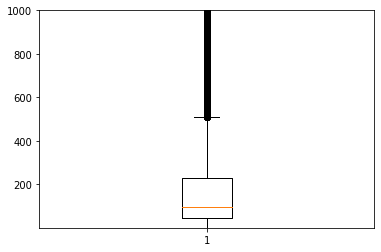

In [89]:
# рассмотрим, как быстро продавались квартиры и построим диаграмму размаха
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

In [90]:
#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20265.000000
mean       180.889366
std        219.730340
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

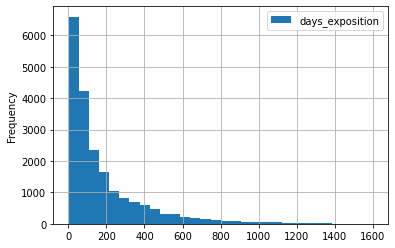

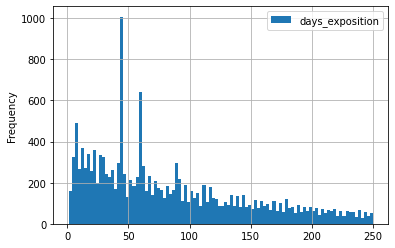

In [91]:
#создадим гистограммы
data.plot(y='days_exposition', kind='hist', bins=30, grid=True, range=(1,1600))
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,250))
plt.show()

***Вывод:***
<div style="border:solid green 1px; padding: 20px"> 
    
Эта гистограмма является распределением Пуассона.     
Медианное время продажи недвижимости - 95 дней. Среднее время продажи объектов - 181 день.  
Наиболее популярное количество дней до снятия объявления от 45 до 90 дней.
Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 250 дней (7,5 месяцев) и дольше. Возможно у такой квартиры завышена цена, либо "непопулярная" площадь.    
    
</div>

<div style="border:solid blue 1px; padding: 20px"> 
    
# Цели:
Какие факторы больше всего влияют на общую (полную) стоимость объекта?  
   Изучить, зависит ли цена от:  
   - общей площади;  
   - жилой площади;  
   - площади кухни;  
   - количества комнат;  
   - этажа, на котором расположена квартира (первый, последний, другой);  
   - даты размещения (день недели, месяц, год).  
Построить отдельные гистограммы для каждого из этих параметров.    
    
</div>

0.7396548832700804

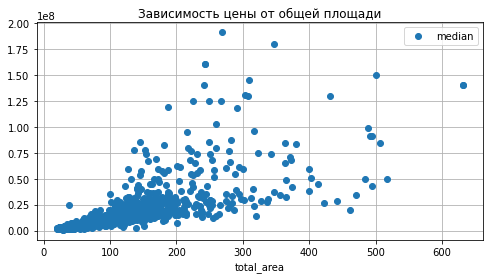

In [92]:
# рассмотрим зависимость цены квартиры от общей площади квартиры.
pt_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_total_area.columns = ['mean', 'count', 'median']
pt_total_area.plot(y = 'median', grid=True, style='o', figsize=(8, 4), title = 'Зависимость цены от общей площади')

pt_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

***Вывод:***
<div style="border:solid green 1px; padding: 20px">  

Согласно полученным данным, чем больше площадь, тем выше стоимость!
По корреляции Пирсона, которая составляет - 0.65, мы видим, что зависимость цены от общей площади квартиры сильная
    
</div>

0.6720383574530152

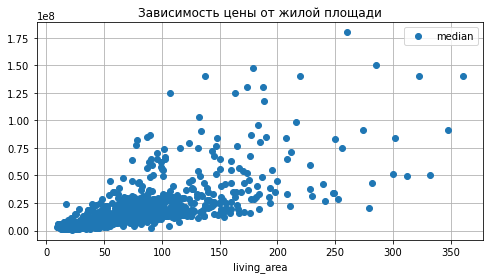

In [93]:
# рассмотрим зависимость цены от жилой площади
pt_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_living_area.columns = ['mean', 'count', 'median']
pt_living_area.plot(y = 'median', grid=True, style='o', figsize=(8, 4), title = 'Зависимость цены от жилой площади')

pt_living_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

***Вывод:***
<div style="border:solid green 1px; padding: 20px">  

Так же как в и изучении общей площади, жилая площадь также сильно влияет на стоимость. Корреляция Пирсона составляет 0.58, что входит в пределы от -1 и до 1.    
    
</div>

0.5883461081317763

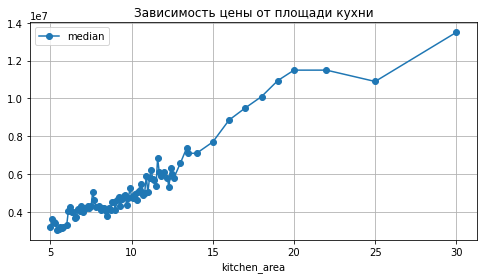

In [94]:
# рассмотрим зависимость цены квартиры от площади кухни.
pt_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_kitchen_area.columns = ['mean', 'count', 'median']
pt_kitchen_area.query('count > 50').plot(y = 'median', grid=True, style='o-', figsize=(8, 4), title = 'Зависимость цены от площади кухни')

pt_kitchen_area.query('count > 50').sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

***Вывод:***
<div style="border:solid green 1px; padding: 20px">  

Корреляция Пирсона составляет 0.51, что входит в пределы от -1 и до 1.  Но зависимость цены от площади кухни уже более слабая.  
    
</div>

0.43145747569633214

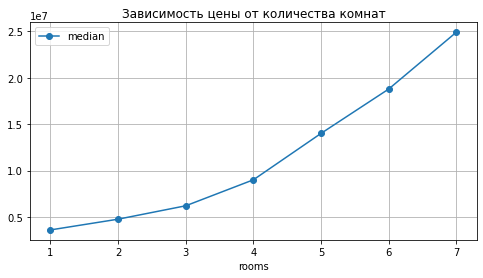

In [95]:
# рассмотрим зависимость цены квартиры от количества комнат.
pt_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_rooms.columns = ['mean', 'count', 'median']
pt_rooms.query('count > 50').plot(y = 'median', grid=True, style='o-', figsize=(8, 4), title = 'Зависимость цены от количества комнат')

pt_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

***Вывод:***
<div style="border:solid green 1px; padding: 20px">  

Корреляция Пирсона составляет 0.36, что входит в пределы от -1 и до 1.  Но зависимость цены от количества комнат слабая.  
Цена квартиры напрямую связана с количеством комнат. Чем больше комнат, тем больше площадь и соотвественно выше цена. 
    
</div>

,mean,count,median
floor_category,,,
другой,6.628389e+06,17232,4850000
первый,4.781207e+06,2881,3900000
последний,6.625810e+06,3307,4300000


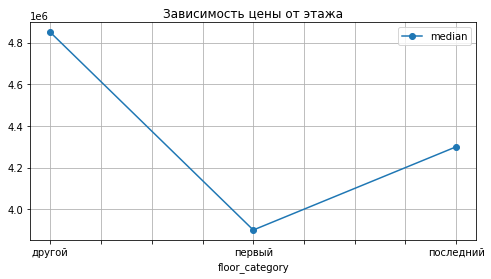

In [96]:
# рассмотрим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой); 
pt_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_floor_category.columns = ['mean', 'count', 'median']
pt_floor_category.plot(y = 'median', grid=True, style='o-', figsize=(8, 4), title = 'Зависимость цены от этажа')
pt_floor_category

***Вывод:***
<div style="border:solid green 1px; padding: 20px">  
    
Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1 этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1 и не на последнем этаже.
    
</div>

,mean,count,median
weekday_create,,,
1,6.293512e+06,4145,4720000
2,6.381415e+06,3911,4700000
0,6.378929e+06,3569,4650000
3,6.695212e+06,4253,4650000
4,6.367174e+06,3967,4580000
5,6.249686e+06,1906,4555000
6,6.261643e+06,1669,4550000


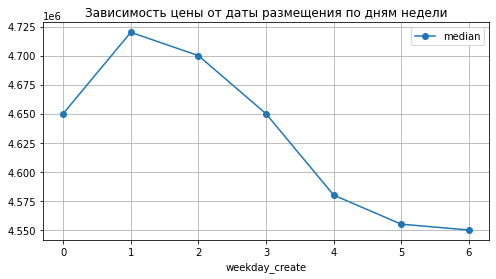

In [97]:
# рассмотрим зависимость цены от даты размещения - день недели
pt_weekday_create = data.pivot_table(index='weekday_create', values='last_price', aggfunc=['mean', 'count', 'median'])
pt_weekday_create.columns = ['mean', 'count', 'median']
pt_weekday_create.plot(y='median', grid=True, style='o-', figsize=(8, 4), title = 'Зависимость цены от даты размещения по дням недели')

pt_weekday_create.sort_values(by='median', ascending=False)

,mean,count,median
month_create,,,
4,6.404578e+06,2342,4800000
9,6.469676e+06,1961,4700000
11,6.442567e+06,2348,4700000
12,6.582408e+06,1628,4700000
2,6.281818e+06,2618,4650000
3,6.217259e+06,2561,4650000
7,6.621998e+06,1670,4650000
1,6.671994e+06,1472,4600000
8,6.371672e+06,1727,4600000


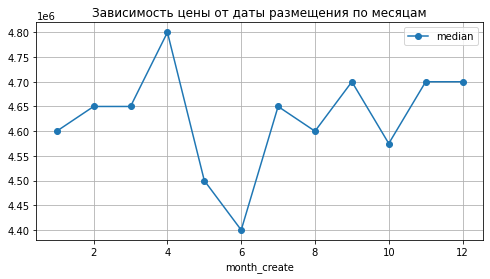

In [98]:
# рассмотрим зависимость цены от даты размещения - месяц
pt_month_create = data.pivot_table(index='month_create', values='last_price', aggfunc=['mean', 'count', 'median'])
pt_month_create.columns = ['mean', 'count', 'median']
pt_month_create.plot(y='median', grid=True, style='o-', figsize=(8, 4), title = 'Зависимость цены от даты размещения по месяцам')

pt_month_create.sort_values(by='median', ascending=False)

,mean,count,median
year_create,,,
2014,1.204660e+07,136,7640000
2015,8.558965e+06,1159,5324000
2019,6.642077e+06,2851,5080000
2018,5.926182e+06,8432,4590000
2016,6.672325e+06,2730,4540000
2017,6.314949e+06,8112,4500000


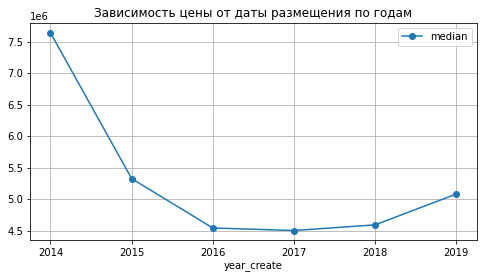

In [99]:
# рассмотрим зависимость цены от даты размещения - год
pt_year_create = data.pivot_table(index='year_create', values='last_price', aggfunc=['mean', 'count', 'median'])
pt_year_create.columns = ['mean', 'count', 'median']
pt_year_create.plot(y='median', grid=True, style='o-', figsize=(8, 4), title = 'Зависимость цены от даты размещения по годам')

pt_year_create.sort_values(by='median', ascending=False)


***Вывод:***
<div style="border:solid green 1px; padding: 20px">  
    
**Зависимость от дня, месяца и года**  
      
*День недели:* дороже всего квартиры, опубликованные во вторник и среду, дешевле всего - в воскресенье.
  Скорее всего стоимость выставленной на продажу недвижимости зависит от активности людей, так как именно в рабочие дни мы видим более высокие цены.  
      
*Месяц:* дороже всего квартиры, продающиеся в апреле, немного ниже по стоимости в сентябре, ноябре и декабре, дешевле всего - в мае и июне.  
  
*Год:*  квартиры очень сильно подешевели в  период с 2016 по 2018 годы, что, возможно, вызвано кризисом 2014-2015 годов.   
В 2019 году цены немного стали повышаться, видимо, экономика пошла в гору.  
    
</div>

<div style="border:solid blue 1px; padding: 20px"> 
    
# Цели:
Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.   
Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.  

</div>

In [100]:
# сравним среднюю стоимость одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений
city_mean = data['locality_name'].value_counts().head(10)
city_square_meter = data.query('locality_name in (@city_mean.index)').pivot_table(values='price_square_meter', index='locality_name')
city_square_meter = city_square_meter.astype(int)
city_square_meter.sort_values('price_square_meter', ascending=False)

,price_square_meter
locality_name,
Санкт-Петербург,114279
Пушкин,103080
деревня Кудрово,92399
поселок Парголово,90175
поселок Мурино,85313
поселок Шушары,78505
Колпино,75330
Гатчина,68745
Всеволожск,68720


***Вывод:***
<div style="border:solid green 1px; padding: 20px">  
    
Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством исторических достопримечательностей и парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из 10 населенных пунктов наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.
    
</div>

<div style="border:solid blue 1px; padding: 20px"> 
    
# Цели:
Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра.  

</div>

,price_square_meter
cityCenters_nearest_km,
0,187174.541176
1,153403.600000
2,143987.966667
3,125717.346228
4,137527.792833
5,145279.235450
6,150834.929487
7,140830.576733
8,120463.401504


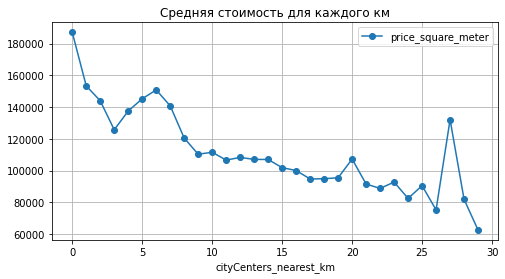

In [101]:
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pt_cityCenters_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_square_meter', aggfunc = 'mean')
pt_cityCenters_km.plot(grid=True, style='o-', figsize=(8, 4), title = 'Средняя стоимость для каждого км')
pt_cityCenters_km

***Вывод:***
<div style="border:solid green 1px; padding: 20px">  
    
Центральная зона - это 6 км и меньше. Дальше 7 км средняя цена на квартиры резко снижается и есть возрастание в 27 км, затем резкое снижение.
    
</div>

### Общий вывод

<div style="border:solid red 1px; padding: 20px">

Мы обработали полученный архив данных - добавили разделители, для удобной работы с данными.  
Проверили данные на присутствие явных и неявных дубликатов в данных.  
Провели изменения в данных и избавились от неявных дубликатов.  
Выявили аномальные значения, которые могли повлиять на результаты анализа. И отбросили все аномальные выбросы.  
Посчитали и заполнили пропущенные значения в столбцах, где это было возможно. Изменили типы данных, в тех столбцах, где они выбивались из нормы.  
Перевели данные в столбце с датой в соответсвующий формат.  
Удалили не нужные в анализе строки, которые составляли не более 10%.  
Полностью подготовили данные к анализу.  

Далее рассчитали стоимость одного квадратного метра, создали столбцы с днем недели, месяца и года, тип этажа.  
Рассчитали отношение общей к жилой площади в процентах.  
Рассчитали отношение площади кухни к общей площади.  
Перевели расстояние до центра города из метров в километры.  

Изучить следующие параметры объектов:    
 - общая площадь;    
 - жилая площадь;    
 - площадь кухни;    
 - цена объекта;      
 - количество комнат;    
 - высота потолков;    
 - этаж, на котором расположена квартира;  
 - тип этажа;    
 - общее количество этажей в доме;    
 - расстояние до центра города в метрах;    
 - расстояние до ближайшего аэропорта;    
 - расстояние до ближайшего парка;    
 - день и месяц публикации объявления.    
    
Построили отдельные гистограммы для каждого из этих параметров и сделали выводы по каждому пункту.    

Изучили как быстро продавались квартиры, рассчитали среднее и медиану.  
Построили гистограмму и сделали выводы.  

Изучили, зависит ли цена от общей и жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира, а также даты размещения.  
Соотнесли взаимосвязь по величинам, что называется "корреляцией".  
И построили гистограммы для каждого пункта и сделали по ним выводы.  

Выделили квартиры в Санкт-Петербурге и высчитали среднюю стоимость для каждого километра.  
Построили гистограмму и сделали вывод.  
      
Проведя анализ данных, произвели расчет стоимости одного квадратного метра жилья, расстояние до центра города в километрах.
Распределили квартиры по типам этажей.  
Распределили объявления по дням, месяцам и годам публикации.  

Изучили общую площадь, жилую площадь и площадь кухни объектов недвижимости, количество комнат в них, высоту потолков, этажи на которых расположены квартиры. Также посчитали расстояние до центра города, ближайшего аэропорта, ближайшего парка.  

Большинство квартир менее 100 кв. м, это квартиры от 50 до 70 кв. м.  
Жилая площадь от 10 до 50 кв.м с площадью кухни от 5 до 15 кв.м.  

В продаже в основном 1, 2 и 3 комнатные квартиры. Меньший спрос на 4-х и более комнатные квартиры.  

Продаются в основном квартиры с высотой потолков от 2,5 до 2,7 м.   

Меньше всех спросом пользуются первые этажи.  

В основном стоимость квартир варьируется от 1,2 до 8 млн. Максимальные продажи квартир в диапазоне от 3 до 5 млн. в зависимости от местоположения и площади.  

Средняя стоимость одного квадратного метра в районе 80-100 тыс.руб.  

Активное размещение объявлений приходится на будние дни с понедельника по пятницу, а значительный спад в выходные дни.  

**Срок продажи квартиры**  

Чаще всего продажи квартир укладывались до 95 дней со дня публикации объявления. Если меньше 45 дней, то это можно считать очень быстрой продажей, если дольше 230 дней - это долгая продажа и скорее всего, связана с неадекватной стоимостью или местоположением.
Есть большое число квартир, проданных всего за несколько дней после публикации.  
  
**Факторы, влияющие на стоимость**  
  
На стоимость больше влияет общая площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты, ,более просторные и лучше вид.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого. 
  
**Стоимость квадратного метра в 10 населённых пунктах**

Наибольшая стоимость квадратного метра жилья в Санкт-Петербурге и составляет 114868 руб.
Наименьшая в Выборге - 58141.  
  
**Факторы, влияющие на стоимость в центре Санкт-Петербурга**   

В центре города практически нет разницы, насколько квартира удалена от условного центра города. Здесь наверняка есть зависимость и от района, где располагается объект и от его характеристик.
В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
В центре есть очень дорогие однокомнатные квартиры.
Экономическая ситуация в стране никак не влияет на элитную недвижимость в центре и неважно какая площадь и какой этаж.
    
</div>    